In [1]:
%%html
<script src="http://www.verovio.org/javascript/latest/verovio-toolkit.js"></script>

Welcome to PatternFinder! In this JupyterNotebook, we're going to poke around some Renaissance imitation masses.

We'll start by introducing the 'Finder' object. Each family of content-based retrieval algorithms implemented in PatternFinder has a Finder object responsible for their execution. In this notebook, we use a group of geometric algorithms developed at the University of Helsinki.

Additionally, PatternFinder is built on top of music21, which we rely on for various music processing tasks, so we'll import that too.

In [6]:
import path # path access to the library from this jupyter notebook
from IPython.display import Image, display # to show examples in this notebook

import music21
from patternfinder import geometric_helsinki

Finder objects are generators. They receive as input a 'pattern' and a 'source', and then yield occurrences of the pattern within the source.

In [7]:
palestrina_kyrie_path = 'music_files/lupi/Missa-Je-suis-desheritee-Palestrina_Kyrie.krn'
# lassus_kyrie_path = 'music_files/lupi/Missa-Je-suis-desheritee-Lassus_Kyrie.xml' # Corrupt xml file
lupi_chanson_path = 'music_files/lupi/Je_suys_desheritee.xml'

my_finder = geometric_helsinki.Finder()

Imitation masses are pieces which borrow melodic or contrapuntal material from another work. Both Palestrina and Lassus wrote imitation masses using Lupi's "Je Suys Desheritee" chanson as a model.

Schubert and Lessoil-Daelman wrote an MTO article investigating these imitation masses. They define a 'module' as a contrapuntal unit which repeats within the same work. In their analysis, they found modules within Lupi's chanson and investigated where and how they occurred in Palestrina's and Lassus' Kyrie. 

By using Schubert and Lessoil-Daelman's analysis of modules within Lupi's chanson, we can extract a number of polyphonic patterns to search for in Palestrina and Lassus' masses.

We'll start with module A1, as defined by Schubert and Lessoil-Daelman. This occurs at the beginning of Lupi's chanson, in the first three measures between the Tenor and the Bass. We extract it from the score with music21.

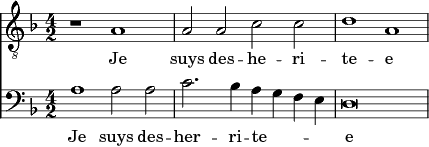

In [9]:
lupi_chanson = music21.converter.parse(lupi_chanson_path)
module_A1 = music21.stream.Score(
    (lupi_chanson.parts['Tenor'].measures(1,3), lupi_chanson.parts['Bass'].measures(1,3)))

Image(module_A1.write('lily.png'))

Let's look for module A1 in both the Palestrina and Lassus masses. When we find something relevant, we'll color it in red and print an excerpt.

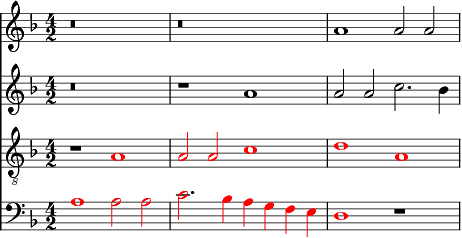

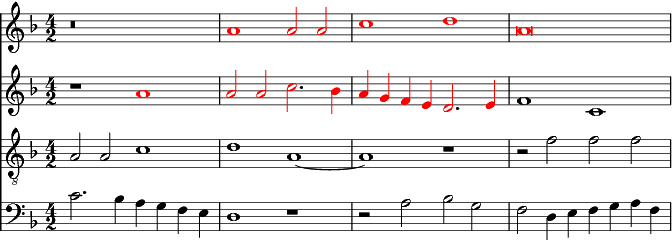

In [13]:
my_finder.update(
    pattern=module_A1,
    source=palestrina_kyrie_path,
    threshold = 0.9,
    scale = 'warped',
    pattern_window = 3,
    source_window = 6)

for occ in my_finder:
    display(Image(occ.get_excerpt('red').write('lily.png')))

These are pieces which have borrowed melodic or contrapuntal material from another work. 
Two Renaissance composers, Palestrina and Lassus, wrote imitation masses borrowing material from Lupi's (a third composer) famous chanson "Je Suys Desheritee".y